## 0. 환경 설정 및 데이터 불러오기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from pathlib import Path
pd.options.display.max_columns = None
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.style.use('seaborn-v0_8')

In [6]:
import platform
import matplotlib.pyplot as plt

try:
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
    elif system_name == 'Windows':  # Windows
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux (예: Ubuntu, Colab)
        plt.rcParams['font.family'] = 'NanumGothic'  # or 'DejaVu Sans'
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    print("그래프의 한글이 깨질 수 있습니다.")

In [7]:
sales = pd.read_csv('../data/preprocessed/sales_fifo.csv')
purchases_vendor = pd.read_csv('../data/preprocessed/purchases_vendor.csv')
inventory = pd.read_csv('../data/preprocessed/inventory.csv')

In [8]:
# 날짜형 변환
sales['fifo_purchase_order_date'] = pd.to_datetime(sales['fifo_purchase_order_date'])
sales['fifo_receiving_date'] = pd.to_datetime(sales['fifo_receiving_date'])
sales['sales_date'] = pd.to_datetime(sales['sales_date'])

# 확인
sales[['fifo_purchase_order_date', 'fifo_receiving_date']].tail()

#################################
# NaN값 존재: purchase보다 sales이 먼저 일어난 경우는 선입선출 날짜 계산 불가능

,fifo_purchase_order_date,fifo_receiving_date
12825358,2024-10-19,2024-10-26
12825359,2024-11-29,2024-12-07
12825360,2024-11-29,2024-12-07
12825361,2024-11-29,2024-12-07
12825362,2024-11-29,2024-12-07


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825363 entries, 0 to 12825362
Data columns (total 23 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   inventory_id              object        
 1   sales_quantity            int64         
 2   sales_dollars             float64       
 3   sales_price               float64       
 4   sales_date                datetime64[ns]
 5   excise_tax                float64       
 6   vendor_id                 int64         
 7   month                     int64         
 8   dayofweek                 int64         
 9   volume                    float64       
 10  purchase_price            float64       
 11  retail_price              float64       
 12  city                      object        
 13  fifo_purchase_cost        float64       
 14  fifo_purchase_order_date  datetime64[ns]
 15  fifo_receiving_date       datetime64[ns]
 16  fifo_invoice_date         object        
 17  is_sho

# 1. store_id 월별 매출 추이

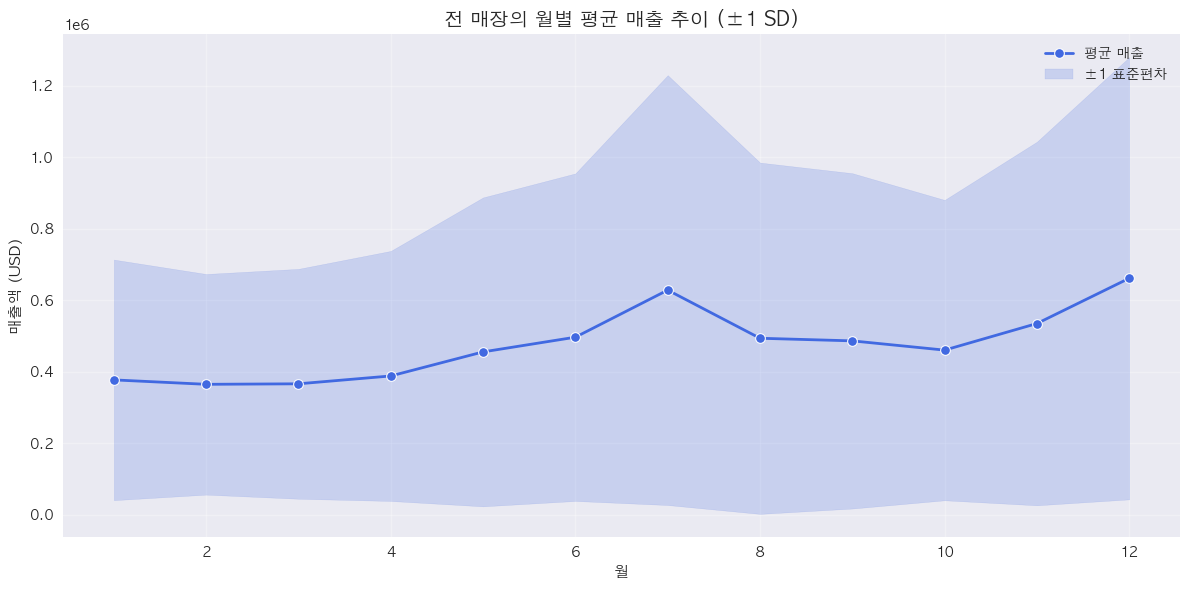

In [12]:
# 매장별 월 매출 합계
monthly_sales = (
    sales
    .groupby(['store_id', 'month'])['sales_dollars']
    .sum()
    .reset_index()
)

# 월 단위 매출 요약
monthly_summary = (
    monthly_sales.groupby('month')['sales_dollars']
    .agg(['mean', 'std'])
    .reset_index()
)

plt.figure(figsize=(12,6))

# 평균선
sns.lineplot(data=monthly_summary, x='month', y='mean', color='royalblue', linewidth=2, marker='o', label='평균 매출')

# 표준편차 음영
plt.fill_between(monthly_summary['month'],
                 monthly_summary['mean'] - monthly_summary['std'],
                 monthly_summary['mean'] + monthly_summary['std'],
                 color='royalblue', alpha=0.2, label='±1 표준편차')

plt.title('전 매장의 월별 평균 매출 추이 (±1 SD)', fontsize=14)
plt.xlabel('월')
plt.ylabel('매출액 (USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


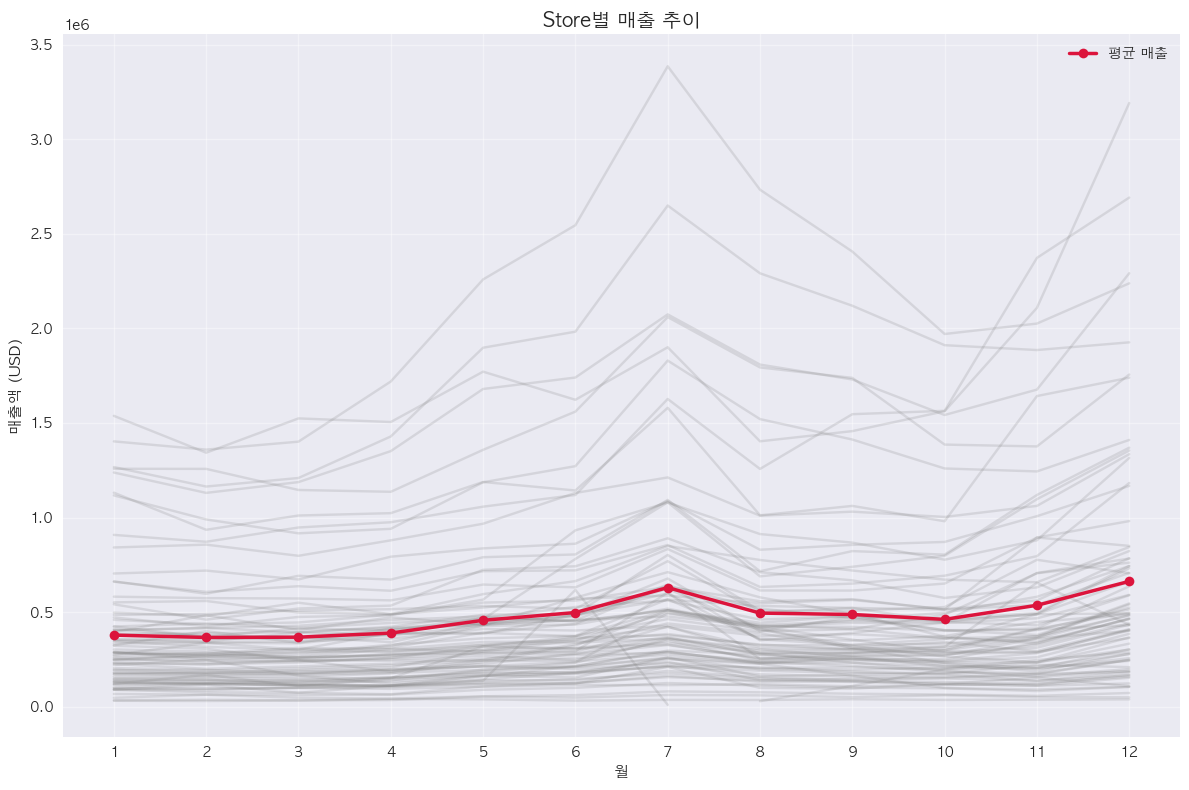

In [44]:
plt.figure(figsize=(12,8))

# 모든 store 얇은 라인
for store in sorted(monthly_sales['store_id'].unique()):
    store_data = monthly_sales[monthly_sales['store_id'] == store]
    plt.plot(store_data['month'], store_data['sales_dollars'], color='gray', alpha=0.2)

# 평균선 강조
plt.plot(monthly_summary['month'], monthly_summary['mean'],
         color='crimson', linewidth=2.5, marker='o', label='평균 매출')

plt.title('Store별 매출 추이', fontsize=14)
plt.xlabel('월')
plt.ylabel('매출액 (USD)')
plt.legend()
plt.grid(alpha=0.4)

# 🔹 x축에 1~12월 모두 표시
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])

plt.tight_layout()
plt.show()
